In [16]:
import numpy as np
import pandas as pd
import librosa 
from scipy.io import wavfile as wav
from six.moves import cPickle as pickle
from sklearn.preprocessing import LabelEncoder, StandardScaler
import os
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import NuSVC
from sklearn.svm import SVC

In [68]:
featuresdf = pickle.load(open('featuresdf53.p', 'rb'))
# featuresdf = pickle.load(open('mfcc_data.p', 'rb'))

In [69]:
featuresdf.head()

,feature,class_label
0,"[-215.79301, 71.66612, -131.81377, -52.091335,...",dog_bark
1,"[-424.68677, 110.56227, -54.148235, 62.01074, ...",children_playing
2,"[-459.56467, 122.800354, -47.92471, 53.265697,...",children_playing
3,"[-414.55377, 102.896904, -36.66495, 54.18041, ...",children_playing
4,"[-447.397, 115.0954, -53.809113, 61.60859, 1.6...",children_playing


In [70]:
featuresdf.feature[0].shape

(53,)

In [72]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Convert features and corresponding classification labels into numpy arrays
X = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label.tolist())

# Encode the classification labels
le = LabelEncoder()
yy = le.fit_transform(y)
print(yy.shape)

(8732,)


In [14]:
# split the dataset 
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 42)

# Naive Bayes

In [17]:
NB = OneVsRestClassifier(GaussianNB())
nbmodel = NB.fit(x_train, y_train)

In [25]:
nb_pred= nbmodel.predict(x_test)

In [26]:
nb_accuracy = np.sum(nb_pred == y_test)/y_test.shape[0]
nb_accuracy

0.529479107040641

# Random Forest

In [27]:
forest = OneVsRestClassifier(RandomForestClassifier(n_estimators = 500, max_depth=20, min_samples_leaf=30))
forestmodel = forest.fit(x_train, y_train)
prediction = forestmodel.predict(x_test)
# prob_pred = forestmodel.predict_proba(x_test)

np.sum(prediction == y_test)/y_test.shape[0]

0.7967945048654836

# SVM

In [35]:
%%time
svm = OneVsRestClassifier(NuSVC(nu=0.05, kernel='rbf'))
svmmodel = svm.fit(x_train, y_train)
svm_pred = svmmodel.predict(x_test)

svm_acc = np.sum(svm_pred == y_test)/y_test.shape[0]
print(svm_acc)

0.8746422438465942
CPU times: user 8.09 s, sys: 30 ms, total: 8.12 s
Wall time: 8.13 s


# 193 features

In this section, we use 193 features as input. We also trained Naive Bayes, Random Forest and SVM model. We want to compare the performance of different feature extraction method.

In [98]:
featuresdf = pickle.load(open('193_features.p', 'rb'))

In [75]:
featuresdf.head()

,shape,label,fold,air_conditioner,car_horn,children_playing,dog_bark,drilling,engine_idling,gun_shot,jackhammer,siren,street_music,sample
0,"(1, 193)",air_conditioner,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[-192.2935333251953, 179.396240234375, 1.61010..."
1,"(1, 193)",jackhammer,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,"[-145.51901245117188, 73.65756225585938, -2.10..."
2,"(1, 193)",street_music,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,"[-218.0377960205078, 120.1659164428711, 3.3796..."
3,"(1, 193)",siren,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"[-378.2143249511719, 159.02928161621094, -16.8..."
4,"(1, 193)",street_music,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,"[-166.35658264160156, 106.22994995117188, -3.6..."


In [101]:
from keras.utils import np_utils
X = np.array(featuresdf["sample"].values.tolist())
lb = LabelEncoder()
yy = lb.fit_transform(featuresdf['label'])
x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 42)

In [102]:
print(yy)
print(yy.shape)
print(X.shape)

[0 7 9 ... 2 0 3]
(8731,)
(8731, 193)


In [103]:

NB = OneVsRestClassifier(GaussianNB())
nbmodel = NB.fit(x_train, y_train)
nb_pred= nbmodel.predict(x_test)
np.sum(nb_pred == y_test)/y_test.shape[0]

0.2604464796794505

In [86]:
forest = OneVsRestClassifier(RandomForestClassifier(n_estimators = 500, max_depth=20, min_samples_leaf=30))
forestmodel = forest.fit(x_train, y_train)
prediction = forestmodel.predict(x_test)
# prob_pred = forestmodel.predict_proba(x_test)

np.sum(prediction == y_test)/y_test.shape[0]

0.8128219805380652

In [87]:
%%time
svm = OneVsRestClassifier(NuSVC(nu=0.05, kernel='rbf'))
svmmodel = svm.fit(x_train, y_train)
svm_pred = svmmodel.predict(x_test)

svm_acc = np.sum(svm_pred == y_test)/y_test.shape[0]
print(svm_acc)

0.8769318832283916
CPU times: user 28.2 s, sys: 9.92 ms, total: 28.2 s
Wall time: 28.3 s


# Using only MFCC feature

In [88]:
featuresdf = pickle.load(open('featuresdf53.p', 'rb'))

In [89]:
X = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label.tolist())

# Encode the classification labels
le = LabelEncoder()
yy = le.fit_transform(y)

In [90]:
X.shape

(8732, 53)

In [91]:
# extract the first 40 dimension of feature53, which is exactly MFCC.
X = X[:, :40]

In [93]:
x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 42)

In [97]:
NB = OneVsRestClassifier(GaussianNB())
nbmodel = NB.fit(x_train, y_train)
nb_pred= nbmodel.predict(x_test)
np.sum(nb_pred == y_test)/y_test.shape[0]

0.49055523755008584

In [95]:
forest = OneVsRestClassifier(RandomForestClassifier(n_estimators = 500, max_depth=20, min_samples_leaf=30))
forestmodel = forest.fit(x_train, y_train)
prediction = forestmodel.predict(x_test)
# prob_pred = forestmodel.predict_proba(x_test)

np.sum(prediction == y_test)/y_test.shape[0]

0.7882083571837436

In [96]:
%%time
svm = OneVsRestClassifier(NuSVC(nu=0.05, kernel='rbf'))
svmmodel = svm.fit(x_train, y_train)
svm_pred = svmmodel.predict(x_test)

svm_acc = np.sum(svm_pred == y_test)/y_test.shape[0]
print(svm_acc)

0.8757870635374928
CPU times: user 6.5 s, sys: 0 ns, total: 6.5 s
Wall time: 6.5 s


# Compare features and models

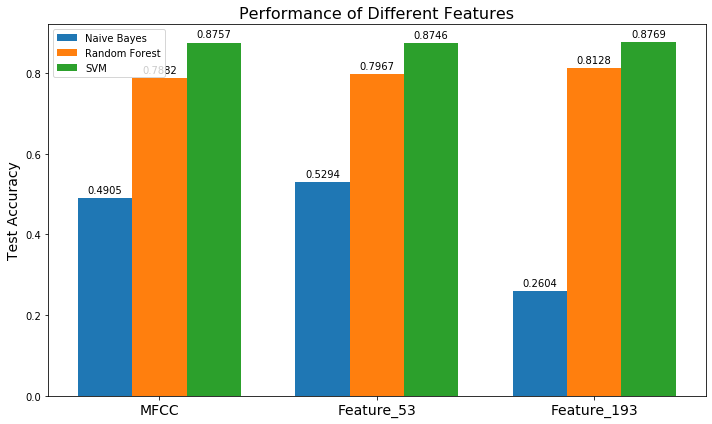

In [117]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['MFCC', 'Feature_53', 'Feature_193']
NB = [0.4905, 0.5294, 0.2604]
RF = [0.7882, 0.7967, 0.8128]
SVM = [0.8757, 0.8746, 0.8769]


x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=[10, 6])
rects1 = ax.bar(x - width, NB, width, label='Naive Bayes')
rects2 = ax.bar(x, RF, width, label='Random Forest')
rects3 = ax.bar(x + width, SVM, width, label='SVM')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Test Accuracy', fontsize = 14)
ax.set_title('Performance of Different Features', fontsize = 16)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize = 14)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
fig.tight_layout()

plt.show()

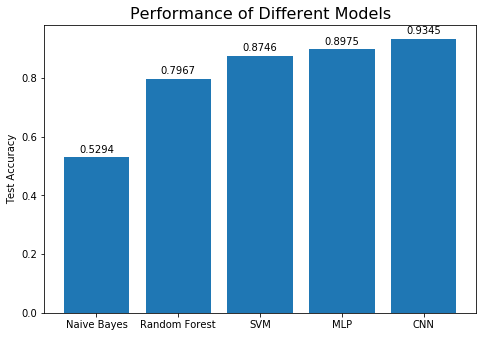

In [120]:
# performance of different models
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Naive Bayes', 'Random Forest', 'SVM', 'MLP', 'CNN']
acc = [0.5294,0.7967,0.8746,0.8975,0.9345]
rect = ax.bar(langs,acc)
autolabel(rect)

ax.set_ylabel('Test Accuracy')
ax.set_title('Performance of Different Models', fontsize = 16)

plt.show()